In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/Users/jasna/Downloads/COVID clinical trials.csv' , index_col = 0)
df

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
Rank,,,,,,,,,,,,,,,,,,,,,
1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,NCT04011644,Mobile Health for Alcohol Use Disorders in Cli...,NaN,Recruiting,No Results Available,Alcohol Drinking|Telemedicine,Behavioral: A-CHESS self-monitored|Behavioral:...,Number of risky drinking days|Number of patien...,"University of Wisconsin, Madison|National Inst...",All,...,2019-0337|R01AA024150|A532007|SMPH/FAMILY MED/...,"March 23, 2020",August 2022,April 2023,"July 8, 2019",NaN,"April 2, 2021","UW Health at the American Center, Madison, Wis...",NaN,https://ClinicalTrials.gov/show/NCT04011644
5780,NCT04681339,Antibiotic Prescription in Children Hospitaliz...,NaN,Not yet recruiting,No Results Available,Community Acquired Pneumonia in Children|Antib...,Other: Antibiotic treatment|Other: No antibiot...,Antibiotic treatment rates in hospitalized chi...,ARCIM Institute Academic Research in Complemen...,All,...,PKA-03,April 2021,November 2024,December 2024,"December 23, 2020",NaN,"February 10, 2021","Die Filderklinik, Filderstadt, Baden-Württembe...",NaN,https://ClinicalTrials.gov/show/NCT04681339
5781,NCT04740229,Moderate-intensity Flow-based Yoga Effects on ...,NaN,Recruiting,No Results Available,Stress|Psychological,Behavioral: Yoga,Perceived Stress|Task switching paradigm|Digit...,University of Illinois at Urbana-Champaign,All,...,21584,"February 10, 20

In [3]:
# Shape of the DataSet
df.shape

(5783, 26)

In [4]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [5]:
df.select_dtypes(include = 'object').columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [6]:
df.select_dtypes(exclude = 'object').columns

Index(['Enrollment'], dtype='object')

In [7]:
# Detecting (Percentage) Missing Data
missing_data = df.isnull().mean() * 100
missing_data

NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
dtype: float64

In [8]:
# Visualize data without calculating 
def visualize_data(data , caption = '' , ylabel = 'Percentage of Mising Data'):
    
    # set figure size
    sns.set(rc={'figure.figsize':(15,8.27)})
    # make ticks vertical
    plt.xticks(rotation=90)
    
    # set title to the image and plot it or the highest 40
    fig = sns.barplot(x = data.keys()[:min(40 , len(data))].tolist() , y = data.values[: min(40 , len(data))].tolist()) \
    .set_title(caption)
    
    # set labels
    plt.ylabel(ylabel)
    
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


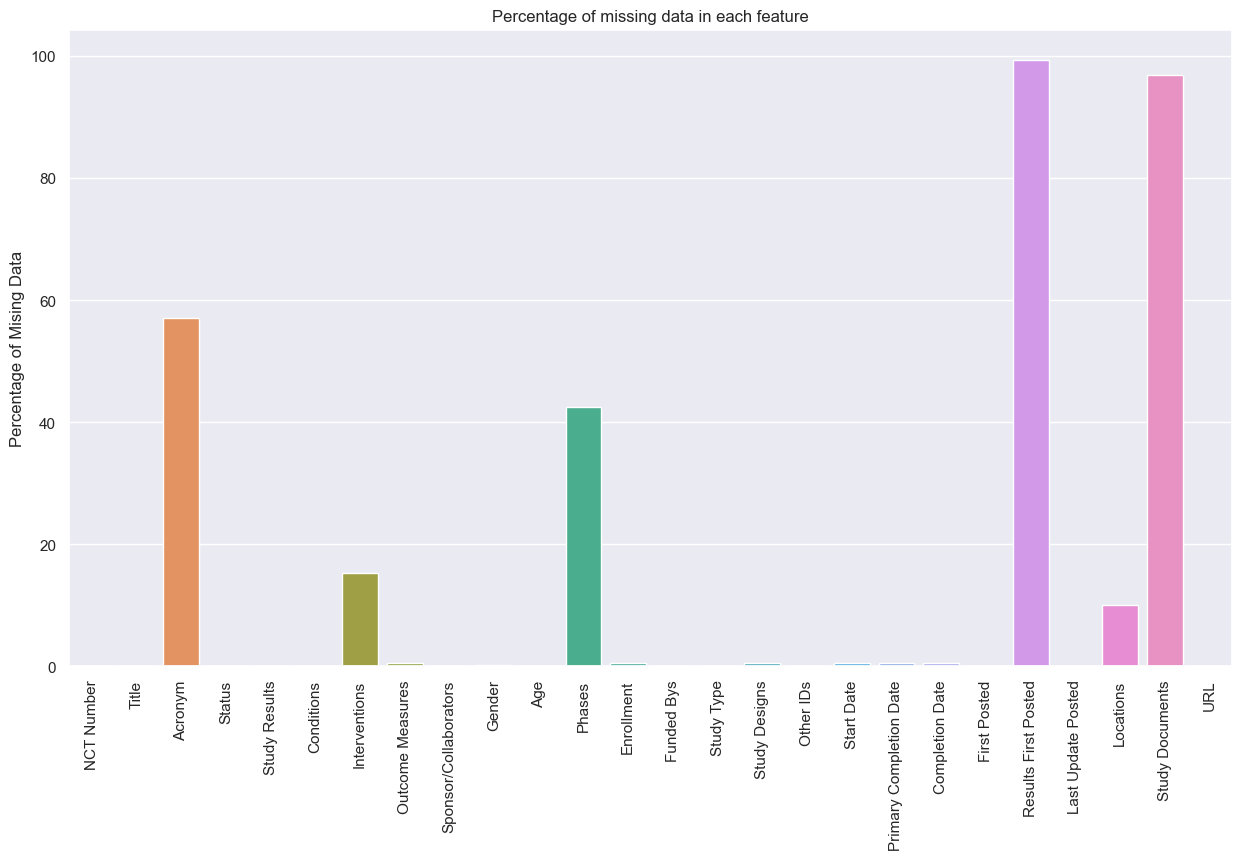

In [9]:
visualize_data(missing_data , 'Percentage of missing data in each feature')

##### As shown the percentae of missing data in Results First Posted is 99.3% and Study Documents is 96.8%, so it's impossible to impute them without destoying our dataset.

In [10]:
# Drop Study Documents and Results First Posted
df.drop(['Results First Posted' , 'Study Documents'] , inplace = True , axis = 1 )

In [11]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [12]:
# Drop Duplicate Rows 
print(f"Shape before dropping duplicates data {df.shape}")
df.drop_duplicates(inplace = True)
print(f"Shape after dropping duplicates data {df.shape}")

Shape before dropping duplicates data (5783, 24)
Shape after dropping duplicates data (5783, 24)


In [13]:
df.isnull().mean() * 100

NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
dtype: float64

In [14]:
# We can extract a new feature form The Location which is the country where the study hold
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries

In [15]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [16]:
df.Country.value_counts()[:35]

Country
 United States          1267
 France                  647
nan                      585
 United Kingdom          306
 Italy                   235
 Spain                   234
 Turkey                  219
 Canada                  202
 Egypt                   192
 China                   171
 Brazil                  137
 Germany                 128
 Belgium                  91
 Mexico                   88
 Switzerland              76
 Russian Federation       69
 Sweden                   57
 Denmark                  56
 Israel                   56
 India                    55
 Pakistan                 53
 Argentina                47
 Netherlands              46
 Norway                   38
 Hong Kong                36
 Colombia                 33
 Republic of              31
 Austria                  29
 Poland                   29
 Singapore                29
 Saudi Arabia             27
 Australia                26
 Greece                   26
 Islamic Republic of      23
 South

#### Now We need to clasify the missing data to one of these categories

##### 1) Missing Completely At Random (MCAR)

##### 2) Missing At Random (MAR)

##### 3) Not Missing At Random (NMAR)

In [17]:
# Lets's start with Acronym

print(f"Number of unique values is {df.Acronym.nunique()} \n")
df.Acronym.value_counts()

Number of unique values is 2338 



Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [18]:
# Find the realtion between null values in Acronym and Countries
(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending = False) * 100)[:60]

Country
 Iraq                      100.000000
 Belarus                   100.000000
 Rwanda                    100.000000
 South Sudan               100.000000
 Cambodia                  100.000000
 Bulgaria                  100.000000
 Cyprus                    100.000000
 Bosnia and Herzegovina    100.000000
 Guinea-Bissau             100.000000
 Dominican Republic        100.000000
 Ecuador                   100.000000
 North Macedonia           100.000000
 Bahrain                   100.000000
 Azerbaijan                100.000000
 Uruguay                   100.000000
 Uzbekistan                100.000000
 Kyrgyzstan                100.000000
 Cape Verde                100.000000
 Republic of                96.774194
 Taiwan                     93.750000
 Singapore                  93.103448
 Japan                      88.888889
 Kuwait                     87.500000
 China                      87.134503
 Turkey                     86.757991
 Ukraine                    85.714286
 Mal

##### After inspecting the relation between the missing values in Acronym and Country we can conclude that there is a sort of relation between these two features, so we can say that Data is Missing At Random (MAR).
##### So we can Impute by Missing Category.

In [19]:
# impute by a missing Indicator  
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [20]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
Country                     0.000000
dtype: float64

##### We can do the same for other categorical features such as Interventions , Phases , Locations and other categorical features

In [21]:
# Impute Interventions , Phases , Locations by Missing Category

categorical_features = df.select_dtypes(include = object).columns

features = categorical_features[df[categorical_features].isnull().mean() > 0]

for feature in features:
    df[feature] = df[feature].fillna(f"Missing {feature}")

In [22]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

NCT Number                 0.00000
Title                      0.00000
Acronym                    0.00000
Status                     0.00000
Study Results              0.00000
Conditions                 0.00000
Interventions              0.00000
Outcome Measures           0.00000
Sponsor/Collaborators      0.00000
Gender                     0.00000
Age                        0.00000
Phases                     0.00000
Enrollment                 0.58793
Funded Bys                 0.00000
Study Type                 0.00000
Study Designs              0.00000
Other IDs                  0.00000
Start Date                 0.00000
Primary Completion Date    0.00000
Completion Date            0.00000
First Posted               0.00000
Last Update Posted         0.00000
Locations                  0.00000
URL                        0.00000
Country                    0.00000
dtype: float64

##### Now the Time to handle The missing data for the Enrollment

In [24]:
# Check the skewness
df.Enrollment.skew()

34.06593382031148

<Axes: ylabel='Density'>

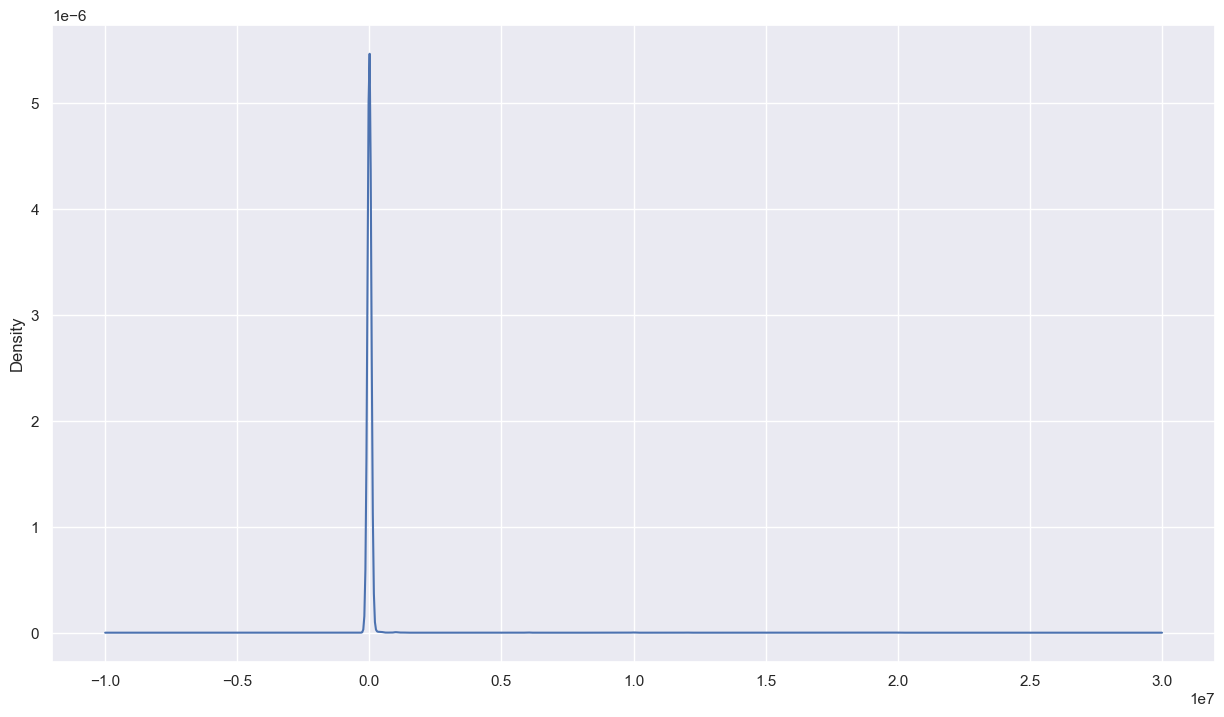

In [25]:
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind = 'kde')

##### The value of Skewness is 34 which means that we This feature isn't normally distributed.
##### So We will impute by the median


In [26]:
# Some Statstical Valuse for the Enrollment Column

min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()

print(f"the min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

the min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841073


In [27]:
# Using Median to impute Missing Values
df.Enrollment = df.Enrollment.fillna(median_Value)

In [28]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Study Results              0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Other IDs                  0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
First Posted               0.0
Last Update Posted         0.0
Locations                  0.0
URL                        0.0
Country                    0.0
dtype: float64

In [29]:
df.head()

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Country
Rank,,,,,,,,,,,,,,,,,,,,,
1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


### Data Visualizations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


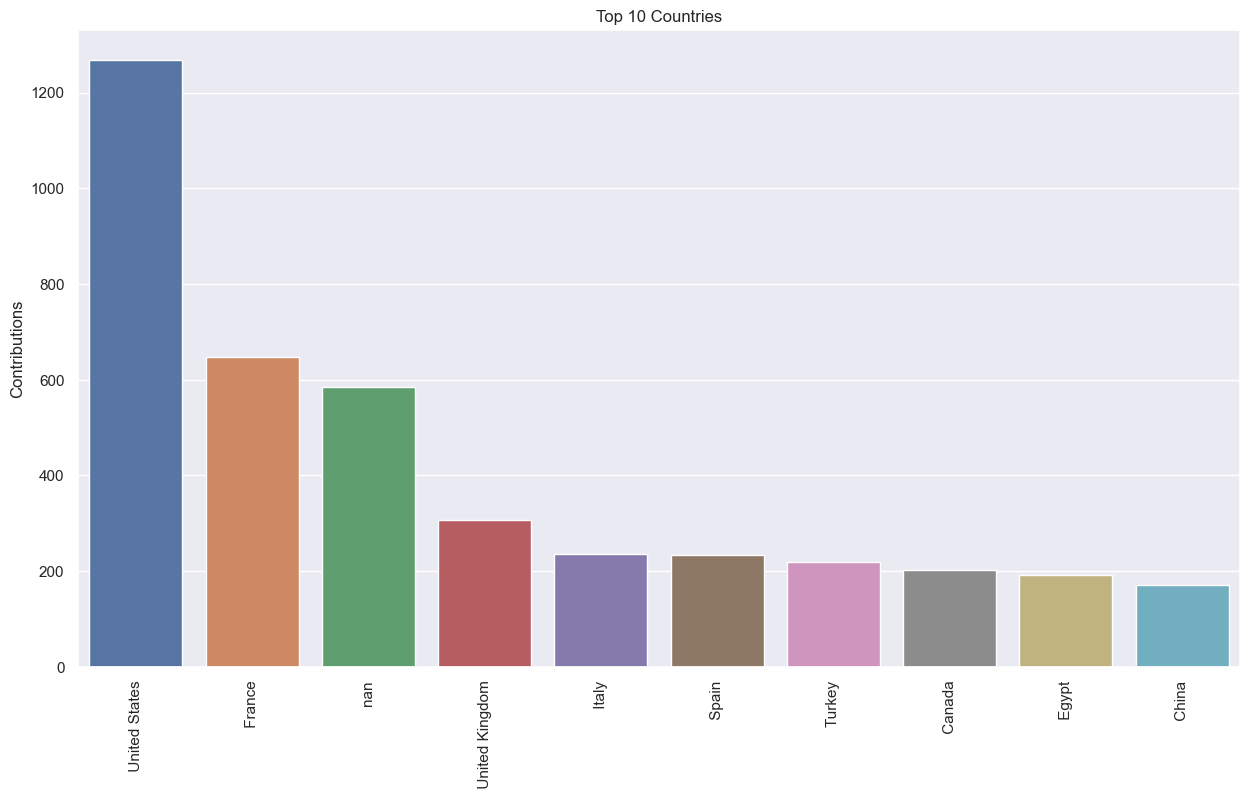

In [30]:
# Get Countires with highest Contributiuons
top_10_Countires = df.Country.value_counts()[:10]
visualize_data(top_10_Countires , caption = 'Top 10 Countries' , ylabel = 'Contributions')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


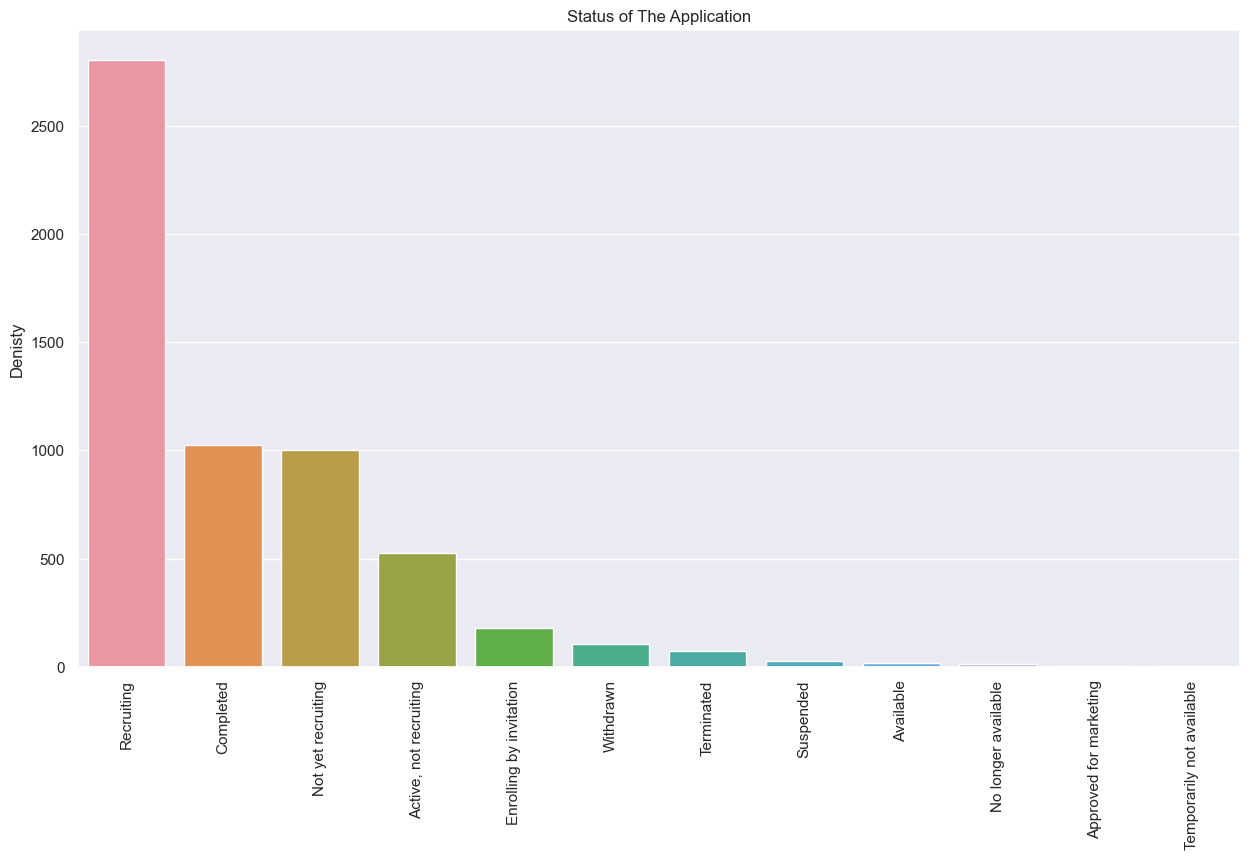

In [31]:
# Status of the Application
status = df.Status.value_counts()

visualize_data(status , caption = 'Status of The Application' , ylabel = 'Denisty')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


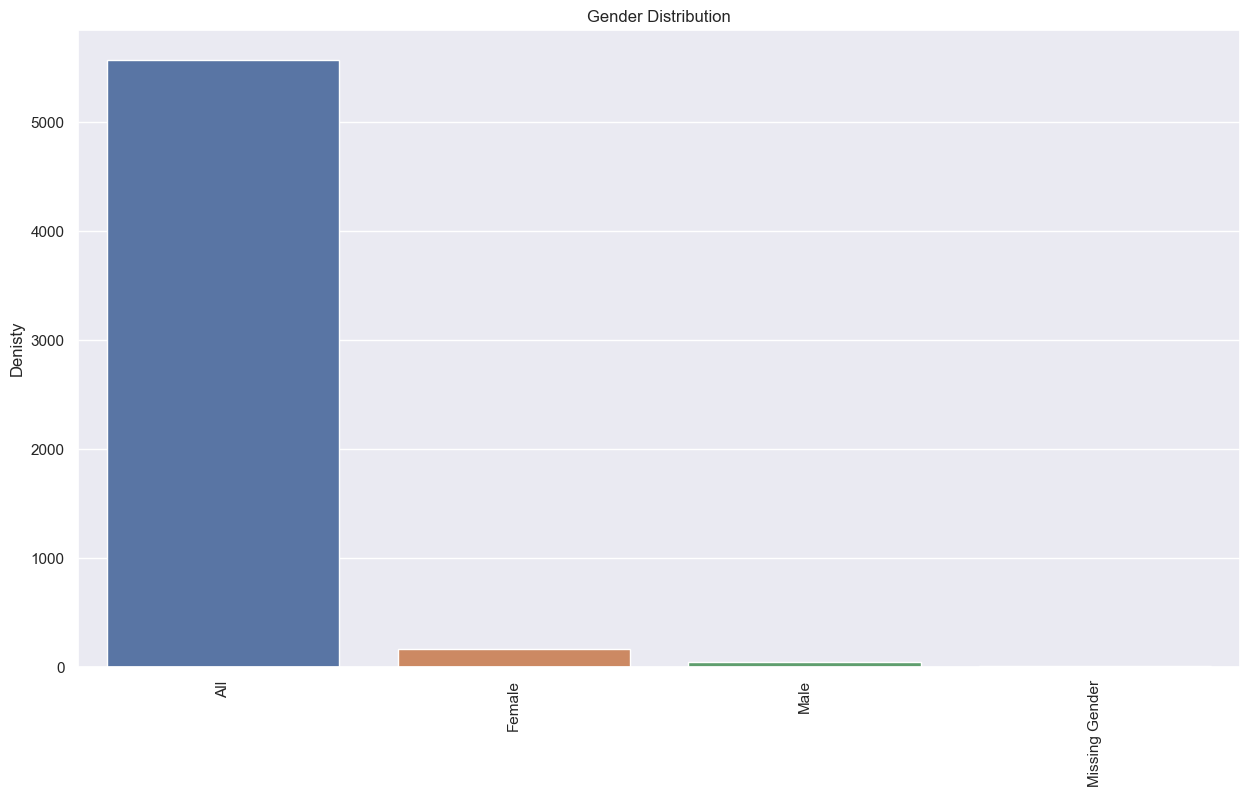

In [32]:
# Gender Visualiztions
gender = df.Gender.value_counts()
visualize_data(gender , caption = 'Gender Distribution' , ylabel = 'Denisty')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


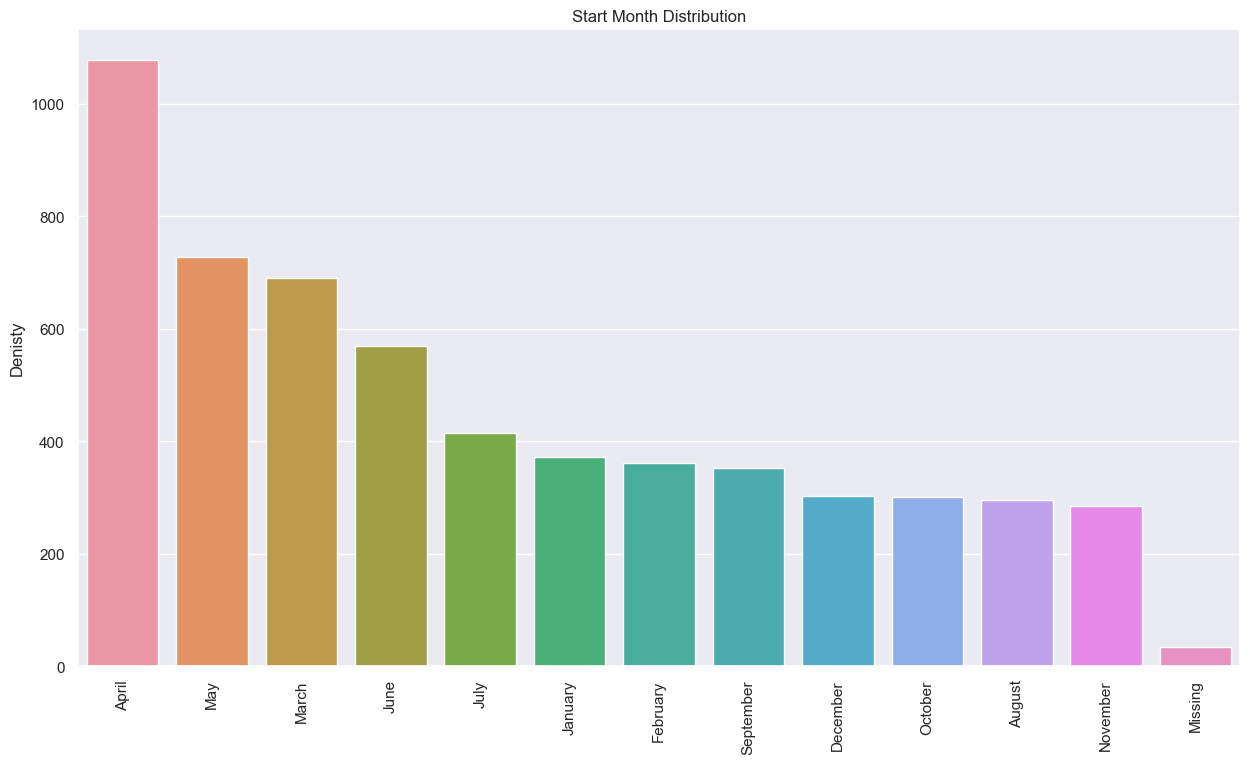

In [33]:
# Which month has the highest start
start_month = pd.Series([ str(df['Start Date'].iloc[i]).split(' ')[0] for i in range (df.shape[0])])

start_month_Distribution = start_month.value_counts()

visualize_data(start_month_Distribution , caption = 'Start Month Distribution' , ylabel = 'Denisty')

In [34]:
print(f"The shape of data frame is {df.shape}")
print(f"Nunique in NCT Number is {df['NCT Number'].nunique()}")
print(f"Nunique in URL is {df.URL.nunique()}")

The shape of data frame is (5783, 25)
Nunique in NCT Number is 5783
Nunique in URL is 5783
